In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.tree import export_graphviz
import graphviz

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


X = np.array([[1,1,0], [0,0,1], [1,0,0], [1,1,0], [0,1,0], [0,1,0], [1,1,1], [1,0,1]])
y = np.array([[1,1,0,0,0,1,1,0]])
df = pd.DataFrame(np.concatenate([X, y.T], axis=1), columns=['Zootopia', 'Moonlight', 'Deadpool', 'Rogue One'])
writer = pd.ExcelWriter('movie_likes.xlsx', engine='xlsxwriter')
df.to_excel(writer, index=False)
del writer

In [3]:
data = pd.read_excel('movie_likes.xlsx')
data

,Zootopia,Moonlight,Deadpool,Rogue One
0,1,1,0,1
1,0,0,1,1
2,1,0,0,0
3,1,1,0,0
4,0,1,0,0
5,0,1,0,1
6,1,1,1,1
7,1,0,1,0


In [4]:
X = data.drop('Rogue One', axis=1)
y = data['Rogue One']

In [5]:
model = DecisionTreeClassifier()

In [6]:
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
accuracy = float((model.predict(X) == y).sum()) / y.shape[0]
print accuracy

0.75


In [8]:
data.assign(**{'Rogue One Prediction': model.predict(X)})

,Zootopia,Moonlight,Deadpool,Rogue One,Rogue One Prediction
0,1,1,0,1,0
1,0,0,1,1,1
2,1,0,0,0,0
3,1,1,0,0,0
4,0,1,0,0,0
5,0,1,0,1,0
6,1,1,1,1,1
7,1,0,1,0,0


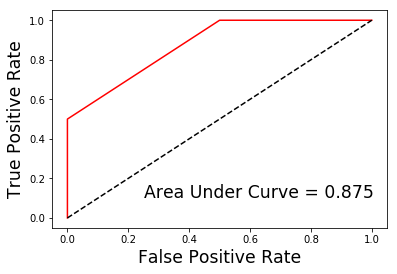

In [9]:
auc = roc_auc_score(y, model.predict_proba(X)[:,1])
fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:,1])
plot([0] + list(fpr), [0] + list(tpr), color='r')
plot([0,1], [0,1], linestyle='--', color='k')
text(0.25, 0.1, 'Area Under Curve = {}'.format(auc), fontsize='xx-large')
xlabel('False Positive Rate', fontsize='xx-large')
ylabel('True Positive Rate', fontsize='xx-large')

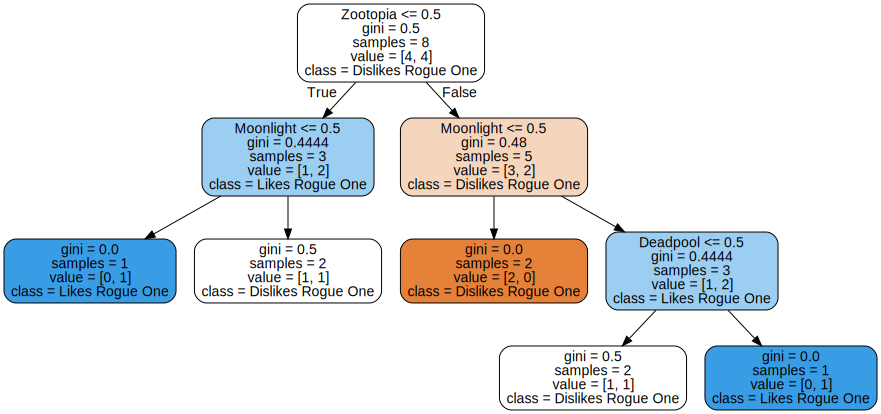

In [10]:
dot_data = export_graphviz(model, out_file=None,
                           feature_names=data.columns[:-1],
                           class_names=['Dislikes {}'.format(data.columns[-1]),
                                        'Likes {}'.format(data.columns[-1])],
                           filled=True, rounded=True)
graphviz.Source(dot_data)